In [ ]:
%pip install ipympl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.3/516.3 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 25.9 MB/s eta 0:00:00


In [ ]:
import os
import re
import ipympl
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mt
import matplotlib.pyplot as plt
from google.colab import output
output.enable_custom_widget_manager()


In [ ]:
def personalizar_grafica(ax_linewidth = 3, bordes_visible = True, label_size=18,show_fig = False):

    plt.gca().tick_params(axis='y', labelsize=16, width=ax_linewidth, length=6)  # Personalizar ejes y
    plt.gca().tick_params(axis='x', labelsize=16, width=ax_linewidth, length=6)  # Personalizar ejes x
    plt.gca().spines['bottom'].set_linewidth(ax_linewidth)  # Grosor del borde inferior del gráfico
    plt.gca().spines['left'].set_linewidth(ax_linewidth)    # Grosor del borde izquierdo del gráfico
    plt.gca().spines['right'].set_linewidth(ax_linewidth)    # Grosor del borde izquierdo del gráfico
    plt.gca().spines['top'].set_linewidth(ax_linewidth)    # Grosor del borde izquierdo del gráfico
    plt.gca().spines['right'].set_visible(bordes_visible)  # Borde derecho
    plt.gca().spines['top'].set_visible(bordes_visible)    # Borde superior
    plt.gca().title.set_fontsize(fontsize=label_size)           # Tamaño del titulo
    plt.gca().xaxis.label.set_size(label_size)           # Tamaño de la etiqueta del eje x
    plt.gca().yaxis.label.set_size(label_size)           # Tamaño de la etiqueta del eje y
    plt.grid(color = 'grey', linewidth = 2, linestyle = '--',zorder = -1)


def extraer_valor_entre_llaves(cadena):
    """
    Extrae el valor numerico entre llaves de una cadena.

    Parameters
    ----------
    cadena : str
        Cadena de texto con valor numerico entre llaves.

    Returns
    -------
        Valor numerico extraido o None si no se encuentra.
    """
    patron = r'\{(\d+)}'
    coincidencia = re.search(patron, cadena)
    if coincidencia:
        return int(coincidencia.group(1))
    else:
        print(f"No se encuentra valor numerico entre las llaves de {cadena}")
        return None

In [24]:
# Lecturas de los datos
df_pca = pd.read_csv('df_pca.csv')
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,y
0,4.704699,-2.544984,-2.340959,-0.243646,2.369903,-0.930762,11
1,4.196406,-3.177289,-2.260735,-0.406439,1.185401,-0.950404,11
2,4.596406,-2.879425,-2.307063,-0.578805,1.850141,-0.538320,11
3,4.607870,-2.387842,-2.658914,-0.491559,1.575319,-0.733445,11
4,4.788373,-2.428973,-2.475070,-0.335480,2.612259,-0.379985,11


In [25]:
# Lectura de las etiquetas
df_labels = pd.read_csv('labels1.csv')
df_labels.head()

,Unnamed: 0,0
0,11,0103/19/M
1,12,0109/22/M
2,13,14157/88/M
3,14,14172/75/M
4,10,15814/58/M


In [26]:
# Diccionario de etiquetas para mejor manejo
df_labels.rename(columns={'Unnamed: 0': 'indice'}, inplace=True)
df_labels.set_index('indice', inplace=True)
mi_dict = df_labels.to_dict()['0']
print(mi_dict)

{11: '0103/19/M', 12: '0109/22/M', 13: '14157/88/M', 14: '14172/75/M', 10: '15814/58/M', 15: 'chf01/71/M', 16: 'chf02/61/F', 17: 'chf03/63/M', 18: 'chf04/54/M', 0: 'f1o03/73/M', 1: 'f1o04/81/M', 2: 'f1o08/73/F', 4: 'f1y08/30/F', 6: 'f1y10/21/F', 3: 'f1y03/34/M', 5: 'f1y09/32/F', 7: 'f2o04/70/F', 8: 'f2o09/77/M', 9: 'f2y07/31/M'}


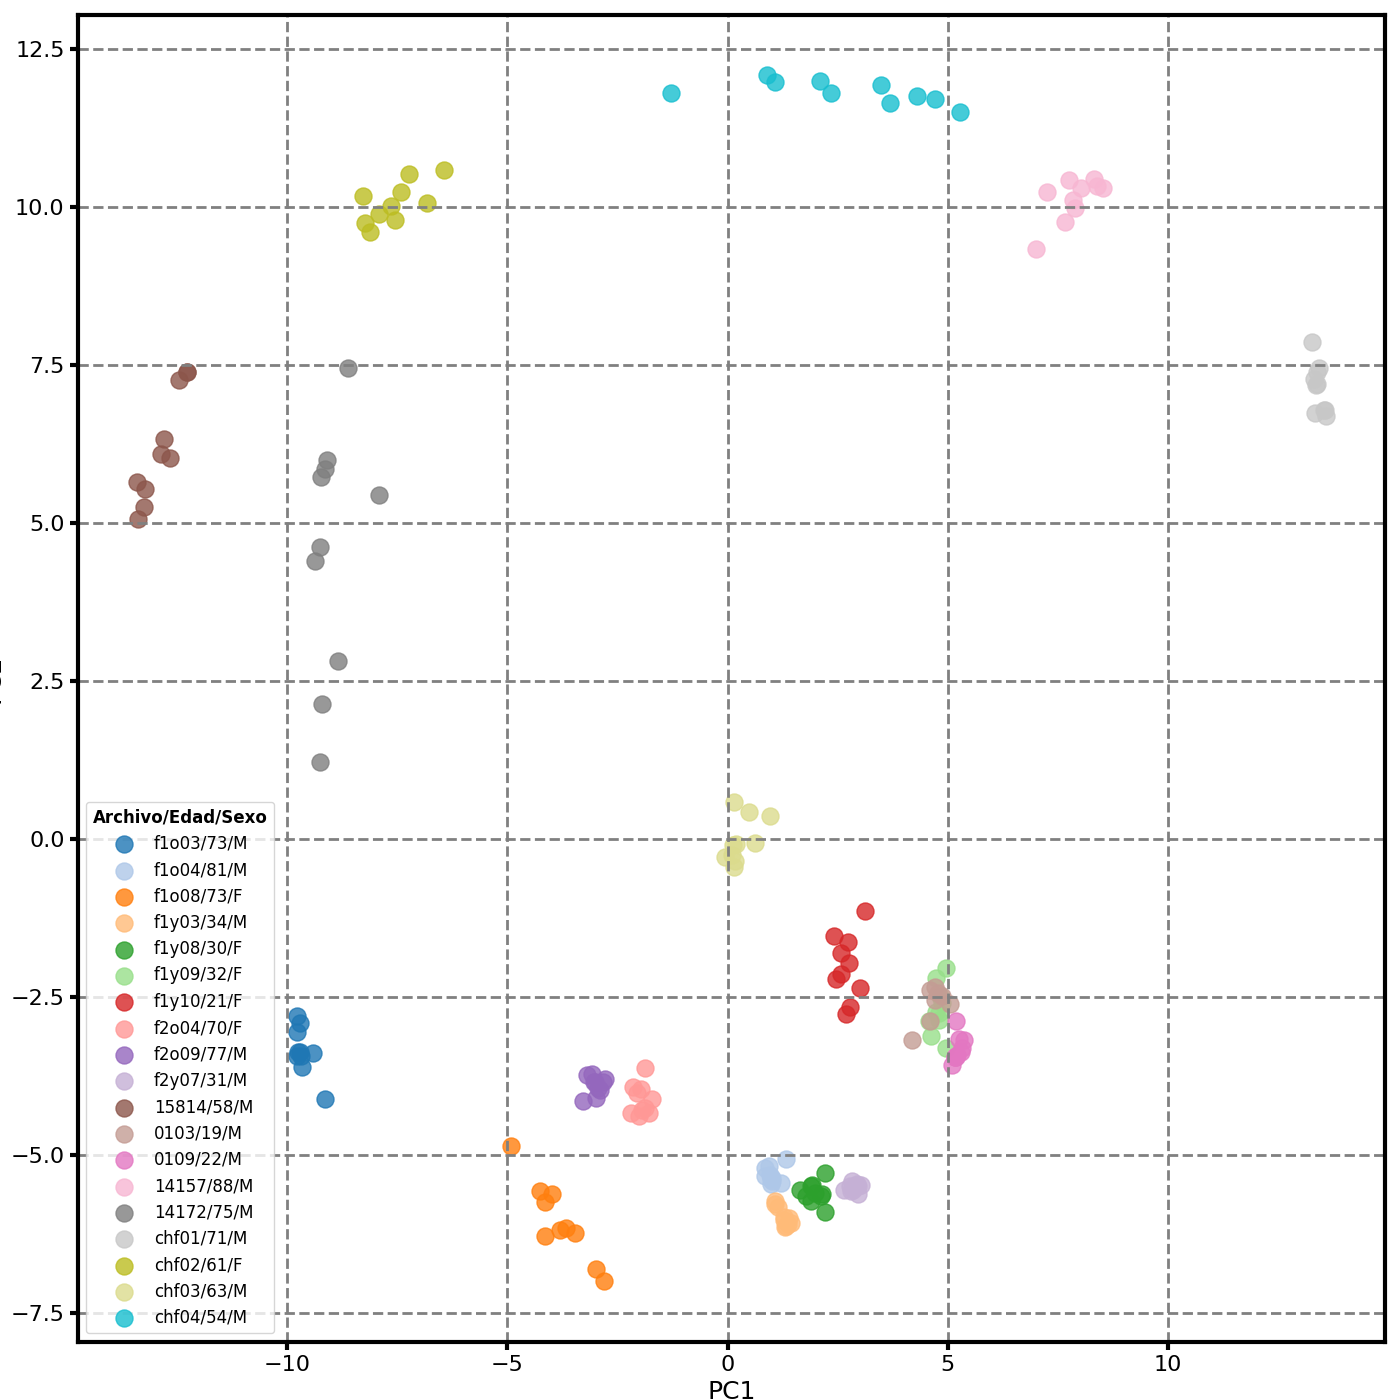

In [27]:
# Plot 2D de PC1 vs PC2
sns.lmplot(data=df_pca, x='PC1', y='PC2', fit_reg=False, hue='y', palette='tab20', legend=False, scatter_kws={'s': 150}, height=14)
ax = plt.gca()
handles2D, labels2D = ax.get_legend_handles_labels() # Obtencion de handles y labels de la legenda que retorna de sns.lmplot
x2 = [mi_dict[int(x)] for x in labels2D] # Matching de las etiquetas que retornan de sns.lmplot con las etiquetas descriptivas
fontPro = mt.font_manager.FontProperties(weight='demibold', size=12) # Seteo de propiedades de la leyenda
ax.legend(labels=x2, loc='best', title='Archivo/Edad/Sexo', fontsize=12, title_fontproperties=fontPro)
personalizar_grafica()
plt.show()

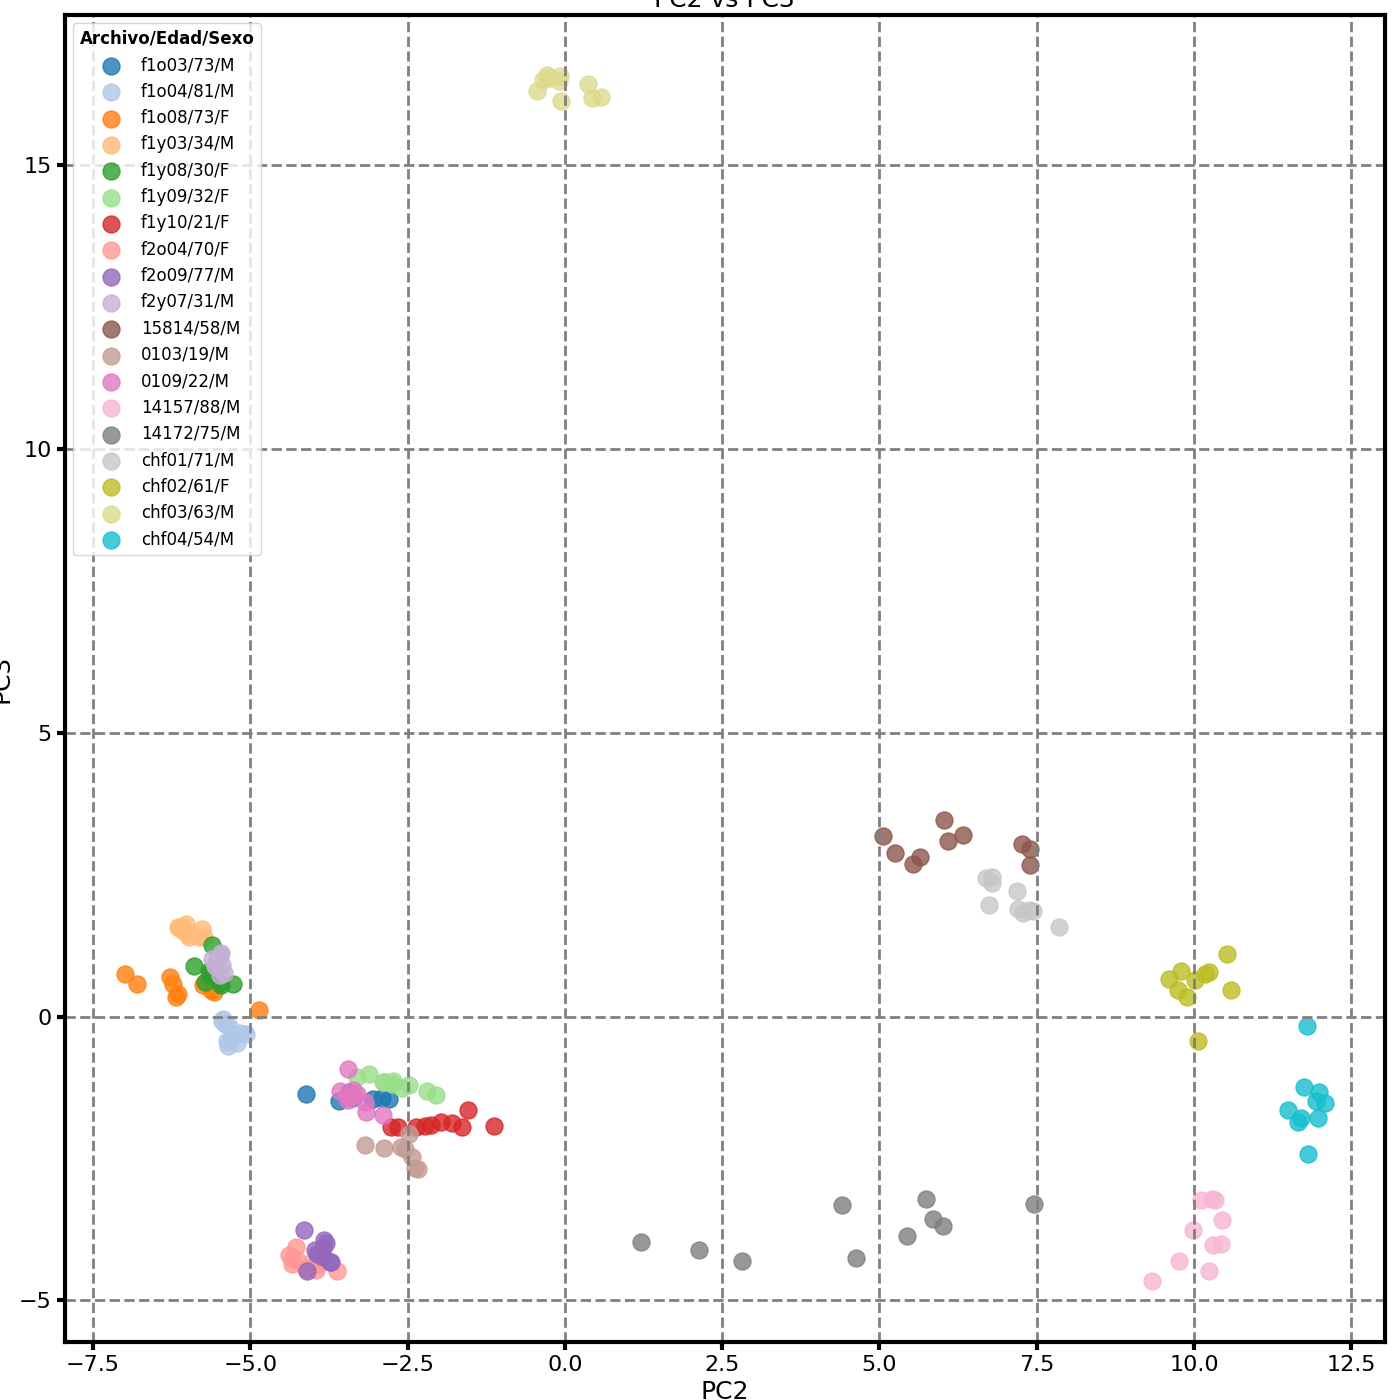

In [ ]:
# Plot 2D de PC2 vs PC3
sns.lmplot(data=df_pca, x='PC2', y='PC3', fit_reg=False, hue='y', palette='tab20', legend=False, scatter_kws={'s': 150}, height=14)
ax = plt.gca()
handles2D, labels2D = ax.get_legend_handles_labels() # Obtencion de handles y labels de la legenda que retorna de sns.lmplot
x2 = [mi_dict[int(x)] for x in labels2D] # Matching de las etiquetas que retornan de sns.lmplot con las etiquetas descriptivas
fontPro = mt.font_manager.FontProperties(weight='demibold', size=12) # Seteo de propiedades de la leyenda
ax.legend(labels=x2, loc='upper left', title='Archivo/Edad/Sexo', fontsize=12, title_fontproperties=fontPro)
ax.set_title("PC2 vs PC3")
personalizar_grafica()
plt.show()

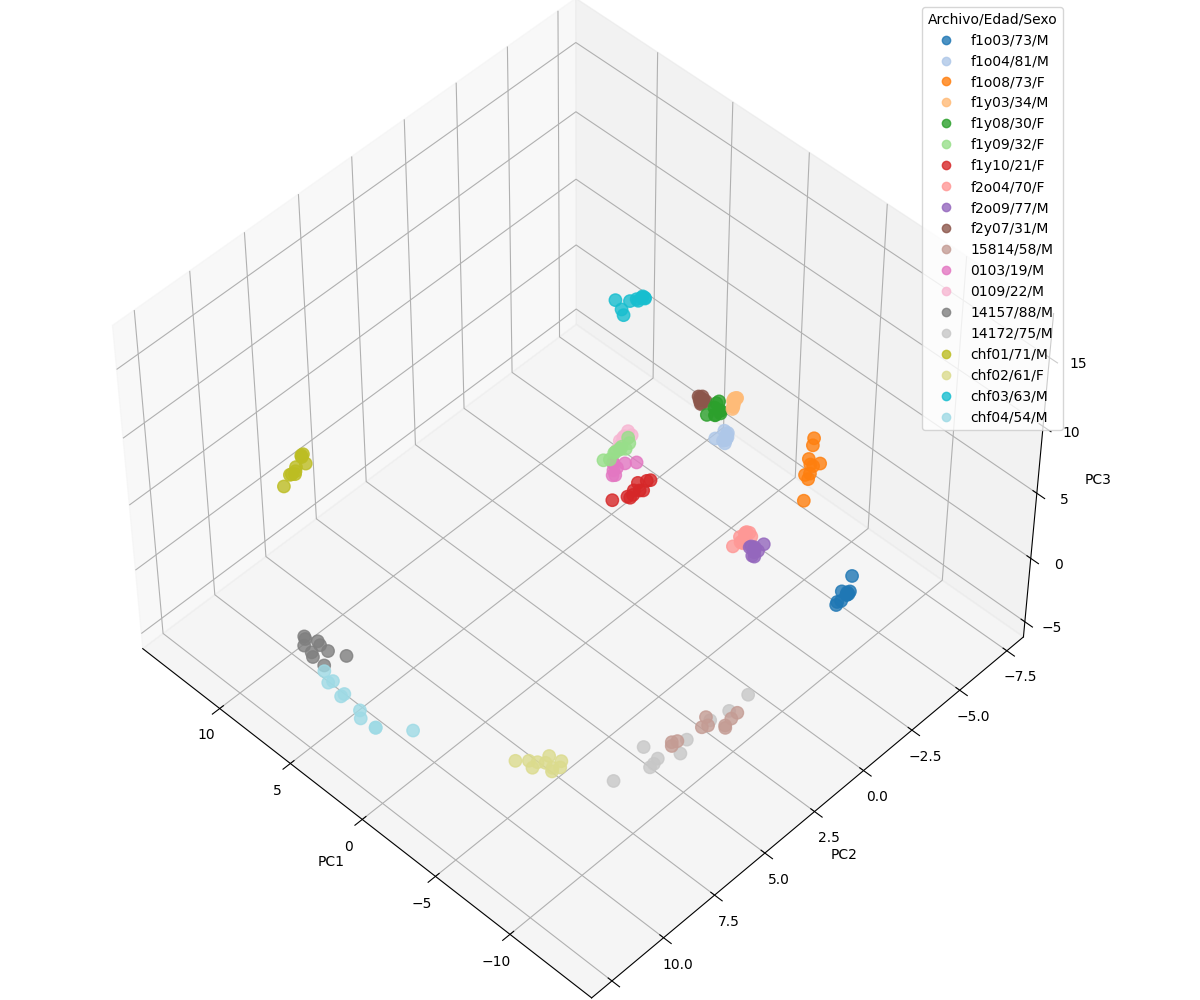

In [ ]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d', elev=48, azim=134)
ax.set_position([0,0,0.95,1])

scatter = ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], c=df_pca['y'], cmap='tab20', s=80, alpha=0.8)
handles,labl = scatter.legend_elements(num=19)
x1 = [mi_dict[extraer_valor_entre_llaves(x)] for x in labl]
legend = ax.legend(handles=handles, labels=x1, loc="best", title="Archivo/Edad/Sexo")
#ax.add_artist(legend)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

De las graficas anteriores se puede observas como todos los ECGs de fantasia (los que comienzan con 'f') y los ECGs 0103 y 0109, de otra BBDD pero de individuos sanos, estan densamente agrupados, cosa que no se veia cuando se proyectaban dichos datos usando la matriz de covarianza del anterior PCA.